In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day = "day_1"

In [2]:
def get_dataframe(f_name, save_xlsx=False):
    with open(f"raw_data/{f_name}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data/{f_name}.xlsx")

    return df

In [ ]:
df = get_dataframe(f"{day}/air", save_xlsx=False)

In [4]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [5]:
def build_raw_data_pickle(save_pickle=None):
    sensor_data = {}
    day = "day_0"
    for matrix in ["air", "sample"]:
        df = get_dataframe(f"{day}/{matrix}")
        sensor_data[f"{matrix}"] = build_sensor_data(df)

    if save_pickle is not None:
        with open(f"{save_pickle}.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [ ]:
sensor_data = build_raw_data_pickle(save_pickle=f"data/{day}/raw")

In [7]:
sensor_data["air"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
21,0,355892538,15832,1752236311,15.978090,918.565125,40.456493,102400000.0,0,1,1,0,0,2025-07-11 15:18:31
124,0,355892538,42904,1752236338,16.473850,918.556213,37.835396,102400000.0,0,1,1,0,0,2025-07-11 15:18:58
224,0,355892538,70283,1752236365,16.486370,918.565918,32.937603,102400000.0,0,1,1,0,0,2025-07-11 15:19:25
323,0,355892538,97513,1752236393,16.523930,918.565613,28.811121,102400000.0,0,1,1,0,0,2025-07-11 15:19:53
427,0,355892538,124772,1752236420,16.461332,918.547852,25.601362,102400000.0,0,1,1,0,0,2025-07-11 15:20:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174,0,355892538,3561459,1752239857,25.871311,918.429688,27.157957,102400000.0,0,1,1,0,0,2025-07-11 16:17:37
13269,0,355892538,3588796,1752239884,25.816219,918.454834,27.094210,102400000.0,0,1,1,0,0,2025-07-11 16:18:04
13371,0,355892538,3616003,1752239912,25.796185,918.479126,27.022449,102400000.0,0,1,1,0,0,2025-07-11 16:18:32
13475,0,355892538,3643355,1752239939,25.736088,918.492920,27.023146,102400000.0,0,1,1,0,0,2025-07-11 16:18:59


In [8]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

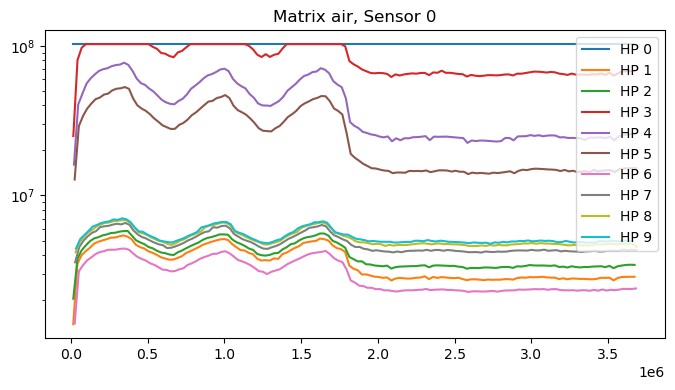

In [9]:
plot_sensor("air", 0, sensor_data)

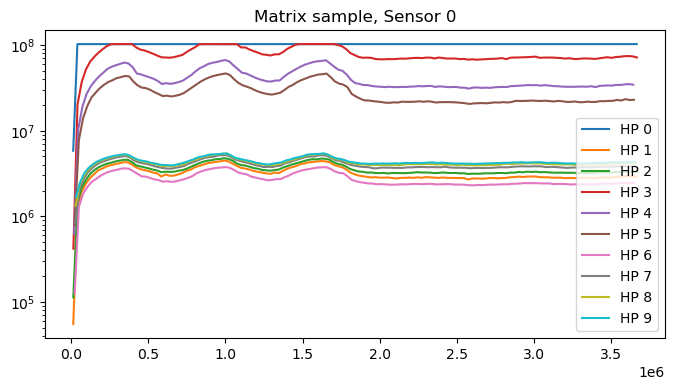

In [10]:
plot_sensor("sample", 0, sensor_data)